In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from itertools import chain
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import copy

In [207]:
data = pd.read_csv('C:\\Users\\Srikar Reddy\\Downloads\\winequality-white.csv', sep =";")

In [208]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [209]:
corr_matrix = data.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


This dataset has no misssing values in any columns. So, the empty values are generated in random manner for 4 columns.

In [210]:
# droppped the last columns as it is the rating 
data_original = data.drop(columns = ['quality'])


In [211]:
class Features:
    
    def __init__(self,data):
        self.data = data
        self.features_removed = []

    def feature_removal(self,method, cols):
        
        print("Selected columns for feature removal are:", cols)
        num_cols = self.data.shape[1]
        data_samples = self.data.shape[0]
        if method == "random":
            if cols == 0 :
                print("None selected")
                return 
            random_cols = random.sample(range(num_cols), cols)
            
            no_samples_to_remove = random.sample(range(data_samples),random.randint(20,40))
            for col in random_cols:
                no_samples_to_remove = random.sample(range(data_samples),int(random.randint(20,40)*data_samples/100))

                self.data.iloc[:,col].where(self.data.iloc[no_samples_to_remove,col]  <0 , inplace = True)

            return self.data
        elif method == "selective":
            if len(cols) == 0 :
                print( "None selcted")
                return 
            rmv_cols = len(cols)
            # cols are selected here
            for col in cols:
                no_samples_to_remove = random.sample(range(data_samples),int(random.randint(20,40)*0.01*data_samples/100))
                self.data.iloc[:,col].where(self.data.iloc[no_samples_to_remove,col]  <0 , inplace = True)
            return self.data
                      
            
features = Features(data_original)
rem_data = features.feature_removal("random",7)

Selected columns for feature removal are: 7


In [212]:
class data_methods():
    
    def __init__(self,data,org_data):
        self.data = data
        self.original_data = org_data
        self.missing_features = []     
        self.drop_cols =[]
    
    def get_missing_features(self):
        no_cols = self.data.shape[1]
        null_columns = []
        info = self.data.isna().any()
        for col in range(0,no_cols):
            if info[col]:
                null_columns.append(col)
        print("Number of columns with null values", len(null_columns))
        print("Columns with null values", null_columns)
        return null_columns
    
    def plot_graphs(self,plot_data,cols):
        
        std_cols = []
        mean_cols =[]
        var_cols= []
        for col in cols:
            std_cols.append(np.std(self.original_data[col]))
            mean_cols.append(np.mean(self.original_data[col]))
            var_cols.append(np.var(self.original_data[col]))
        
       
        fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(15,15))
        
        mean_diff = plot_data['mean'] - mean_cols
        plot_data.insert(1,"original_std", std_cols)
        plot_data.insert(3,"original_var", var_cols)
        plot_data.insert(5,"original_mean", mean_cols)
        plot_data.insert(6,"mean_diff",mean_diff)
        plot_data.insert(7,'std_diff', plot_data['std'] - std_cols)
        plot_data.insert(8,'var_diff', plot_data['var'] - var_cols)
        plot_data.insert(9,'columns', self.drop_cols)

        plot_data.plot(  ax = axes[0,0],y =['std','original_std'],kind='bar', title = 'Differences in standard deviation ')
        plot_data.plot(  ax = axes[0,1],y =['var','original_var'],kind='bar',title = 'Differences in variance ')
        plot_data.plot(  ax = axes[1,0],y =['mean','original_mean'],kind='bar',title = 'Differences in mean')
        plot_data.plot(  ax = axes[1,1],y='MSE',kind='bar',title = 'MSE for the interpolated data')
        plot_data.plot(  ax = axes[2,0],x ='columns',y = ['mean_diff'], kind = 'bar')
        plot_data.plot(  ax = axes[2,1],x = 'columns',y='var_diff', kind = 'bar')
       
    
    def plot_perc_of_null_values(self):
        df_null = []
        samples = len(self.data)
        for col in self.data.columns:
#             print(self.data[col].isna().sum())
            df_null.append((self.data[col].isna().sum()/samples)*100)
        df_null = pd.DataFrame(df_null, columns = ['values_missing'])
        df_null.plot(kind='bar', title ='percentage of values missing')

    def error_predict(self, data2,cols):
    
        std_cols = []
        mean_cols =[]
        var_cols = []
        mse_cols =[]
       
        for col in cols:
            std_cols.append(np.std(data2[col]))
            mean_cols.append(np.mean(data2[col]))
            var_cols.append(np.var(data2[col]))
       
            mse_cols.append(mean_squared_error(data2[col], self.original_data[col]))
            
        plot_data = pd.DataFrame(list(zip(std_cols,var_cols,mean_cols,mse_cols)),columns=["std", "var","mean","MSE"])
        self.plot_graphs(plot_data,cols)
     
    def predict(self,data1, weights):
            return np.dot(data1,weights)  
        
    
    def mean_naive(self):
        drop_cols= self.get_missing_features()
       
        data_copy = self.data.copy(deep=True)
        for col in drop_cols:
            mean_of_col = round(data_copy.iloc[:,col].mean(),3)
            data_copy.iloc[:,col].fillna(mean_of_col, inplace = True)
        
        
        drop_cols = [ data_copy.columns[i]  for i in drop_cols]
        self.drop_cols = drop_cols
        self.error_predict(data_copy,drop_cols)
    
    
        
    def naive_lin_regression(self): # split data and col name
    
        missing_features  = self.get_missing_features()
        
        # create a local temp copy of data 
        data_copy = self.data.copy(deep=True)
        
        number_of_null_values = data_copy.isnull().sum(axis=0)
        
        columns_to_drop = number_of_null_values.nlargest(len(missing_features))
        drop_data = columns_to_drop
        drop_cols = []
        drop_cols = list(drop_data.index.values)
   
        copy_of_drop_cols = copy.deepcopy(drop_cols)
        
        def get_lin_weights(X,Y):
           
            XTX_inv =  np.linalg.inv(np.dot(X.T,X))   
            W_trained = np.dot(XTX_inv.T,(np.dot(X.T,Y)))
            return np.reshape(W_trained, (len(W_trained),-1))

        
        
        for col in drop_cols[::-1]:
            copy_of_drop_cols.remove(col)
            complete_data = data_copy[data_copy.columns.drop(copy_of_drop_cols)] # this has only one col with null values
        
            testing_data = complete_data[complete_data.isna().any(axis=1)]
            training_data = complete_data.dropna(how='any',axis=0)
            null_rows = testing_data.index
            testing_data = testing_data.dropna(axis = 1)
                
            W = get_lin_weights(training_data.drop(col,axis = 1), training_data[col] )
            predicted_data = self.predict(testing_data, W)
            testing_data[col] = predicted_data
    
            for i, row in enumerate(null_rows):
                data_copy.loc[row,col] = testing_data.loc[row,col] 
        
           
        self.error_predict(data_copy,drop_cols)
        
    
    
    def ridge_regression(self,lam):
             
        missing_features  = self.get_missing_features()
        
        # create a local temp copy of data 
        data_copy = self.data.copy(deep=True)
        
        number_of_null_values = data_copy.isnull().sum(axis=0)
        
        columns_to_drop = number_of_null_values.nlargest(len(missing_features))
        drop_data = columns_to_drop
        drop_cols = []
        drop_cols = list(drop_data.index.values)
   
        copy_of_drop_cols = copy.deepcopy(drop_cols)
        
        def get_ridge_weights(X,Y,lam):
            
            lam_inv = lam*np.identity(X.shape[1])
            XTX_inv =  np.linalg.inv(np.dot(X.T,X) + lam_inv)   
            W_trained = np.dot(XTX_inv.T,(np.dot(X.T,Y)))
            return np.reshape(W_trained, (len(W_trained),-1))

        
        for col in drop_cols[::-1]:
            copy_of_drop_cols.remove(col)
            # this has only one col with null values
            complete_data = data_copy[data_copy.columns.drop(copy_of_drop_cols)] 
        
            testing_data = complete_data[complete_data.isna().any(axis=1)]
            training_data = complete_data.dropna(how='any',axis=0)
            null_rows = testing_data.index
            testing_data = testing_data.dropna(axis = 1)
            
    
            W = get_ridge_weights(training_data.drop(col,axis = 1), training_data[col], lam )
            predicted_data = self.predict(testing_data, W)
            testing_data[col] = predicted_data
    
            for i, row in enumerate(null_rows):
                data_copy.loc[row,col] = testing_data.loc[row,col] 
        self.error_predict(data_copy,drop_cols)

    
    
    def lasso_regression(self,lam):
        missing_features  = self.get_missing_features()
        
        # create a local temp copy of data 
        data_copy = self.data.copy(deep=True)
        
        number_of_null_values = data_copy.isnull().sum(axis=0)
        
        columns_to_drop = number_of_null_values.nlargest(len(missing_features))
        drop_data = columns_to_drop
        drop_cols = []
        drop_cols = list(drop_data.index.values)
   
        copy_of_drop_cols = copy.deepcopy(drop_cols)
        
        def get_lasso_weights(X,Y,lam):
            X = np.array(X)
            Y = np.array(Y).reshape((len(Y),1))
            
            samples, features = X.shape
            iterations = 100
            w_lasso = np.zeros(shape = (features,1))
            bias = 1
            
            def threshold(arg1, lam)-> float:
                if arg1 < 0 and lam < abs(arg1):
                    return arg1- lam
                elif arg1 > 0 and lam < abs(arg1):
                    return arg1 + lam
                else:
                    return 0.0
            for i in range(iterations):
                for j in range(0,features):
                    term = np.dot(X[:,j], Y - np.dot(X,w_lasso))
                    denom = np.dot(X[:,j].T, X[:,j])
                    term_pos = (-term + (lam/2))/denom
                    term_neg = (-term - (lam/2))/denom

                    if w_lasso[j] > term_pos:
                        w_lasso [j] = w_lasso[j] - term_pos 
                    elif w_lasso[j] < term_neg:
                        w_lasso [j] = w_lasso[j] - term_neg
                    else:
                        w_lasso[j] = 0
            return w_lasso.flatten()

        
        for col in drop_cols[::-1]:
            copy_of_drop_cols.remove(col)
            # this has only one col with null values
            complete_data = data_copy[data_copy.columns.drop(copy_of_drop_cols)] 
        
            testing_data = complete_data[complete_data.isna().any(axis=1)]
            training_data = complete_data.dropna(how='any',axis=0)
            null_rows = testing_data.index
            testing_data = testing_data.dropna(axis = 1)
            
    
            W = get_lasso_weights(training_data.drop(col,axis = 1), training_data[col], lam )
            predicted_data = self.predict(testing_data, W)
            testing_data[col] = predicted_data
        
            for i, row in enumerate(null_rows):
                data_copy.loc[row,col] = testing_data.loc[row,col] 
                
        self.error_predict(data_copy,drop_cols)
    
    
    def knn(self,k):
        missing_features  = self.get_missing_features()

        # create a local temp copy of data 
        data_copy = self.data.copy(deep=True)

        number_of_null_values = data_copy.isnull().sum(axis=0)

        columns_to_drop = number_of_null_values.nlargest(len(missing_features))
        drop_data = columns_to_drop
        drop_cols = []
        drop_cols = list(drop_data.index.values)

        copy_of_drop_cols = copy.deepcopy(drop_cols)


        for col in tqdm(drop_cols[::-1]):

            copy_of_drop_cols.remove(col)
            complete_data = data_copy[data_copy.columns.drop(copy_of_drop_cols)] # this has only one col with null values

            testing_data = complete_data[complete_data.isna().any(axis=1)].fillna(0)
            training_data = complete_data.dropna(how='any',axis=0)
            null_rows = testing_data.index
            
            training_data = np.array(training_data)
            sample_dim = training_data.shape
            for row in testing_data.index:
                
                test_row = np.array(testing_data.loc[row,:])
                neighbours = np.zeros(sample_dim[0])
                for i,train_row in enumerate(training_data):
                    neighbours[i] = ((np.array(train_row) - np.array(test_row))**2).sum()
                neighbour_df = pd.DataFrame(neighbours)
                neighbour_df =  neighbour_df[0].sort_values()[0:k]
                
                break
                testing_data.loc[row,col] = np.mean(np.array(neighbour_df))               
            
            for i, row in enumerate(null_rows):
                data_copy.loc[row,col] = testing_data.loc[row,col]
        
        self.error_predict(data_copy,drop_cols)
    
  

        

Number of columns with null values 7
Columns with null values [1, 2, 3, 4, 6, 7, 8]
Number of columns with null values 7
Columns with null values [1, 2, 3, 4, 6, 7, 8]
Number of columns with null values 7
Columns with null values [1, 2, 3, 4, 6, 7, 8]
Number of columns with null values 7
Columns with null values [1, 2, 3, 4, 6, 7, 8]


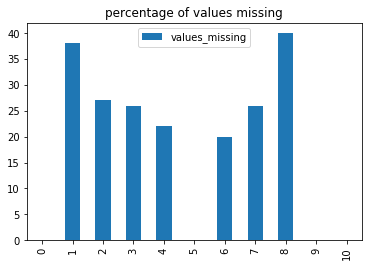

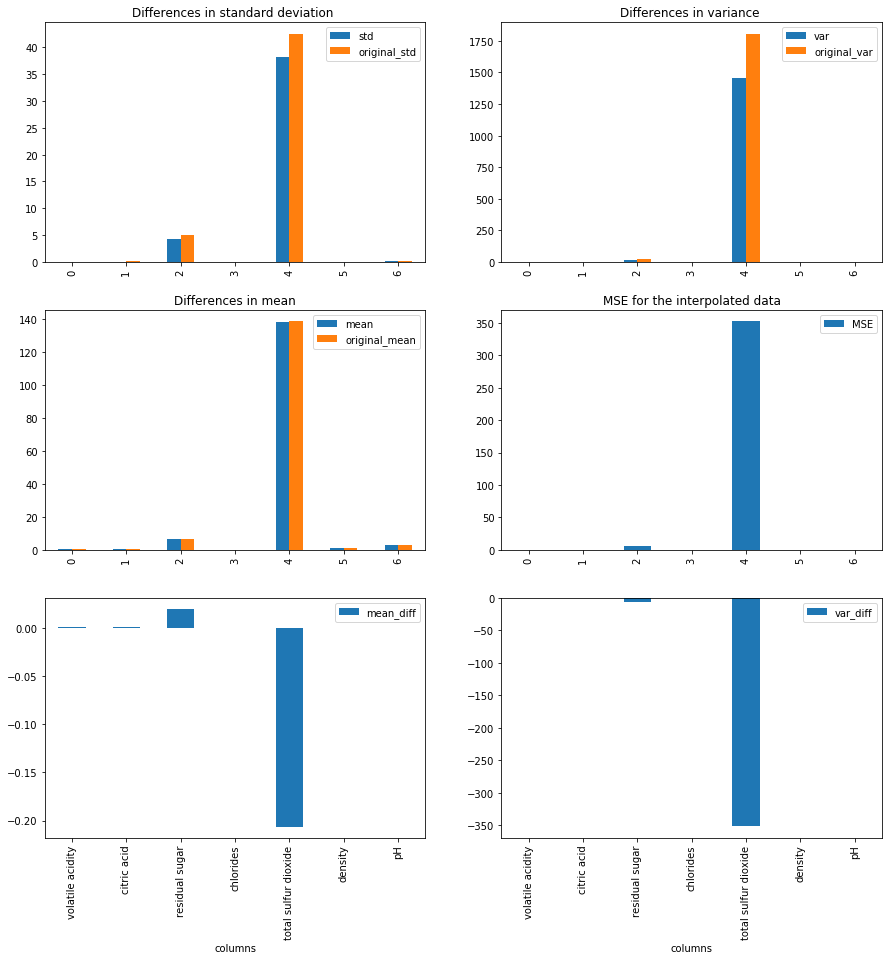

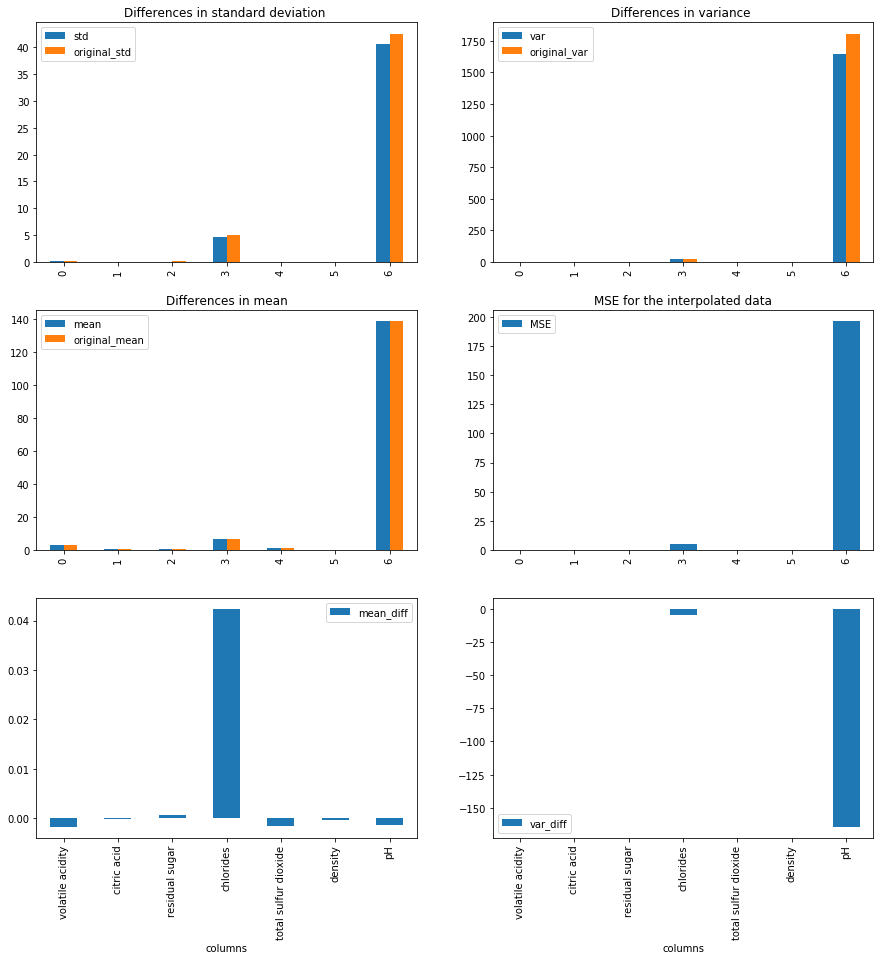

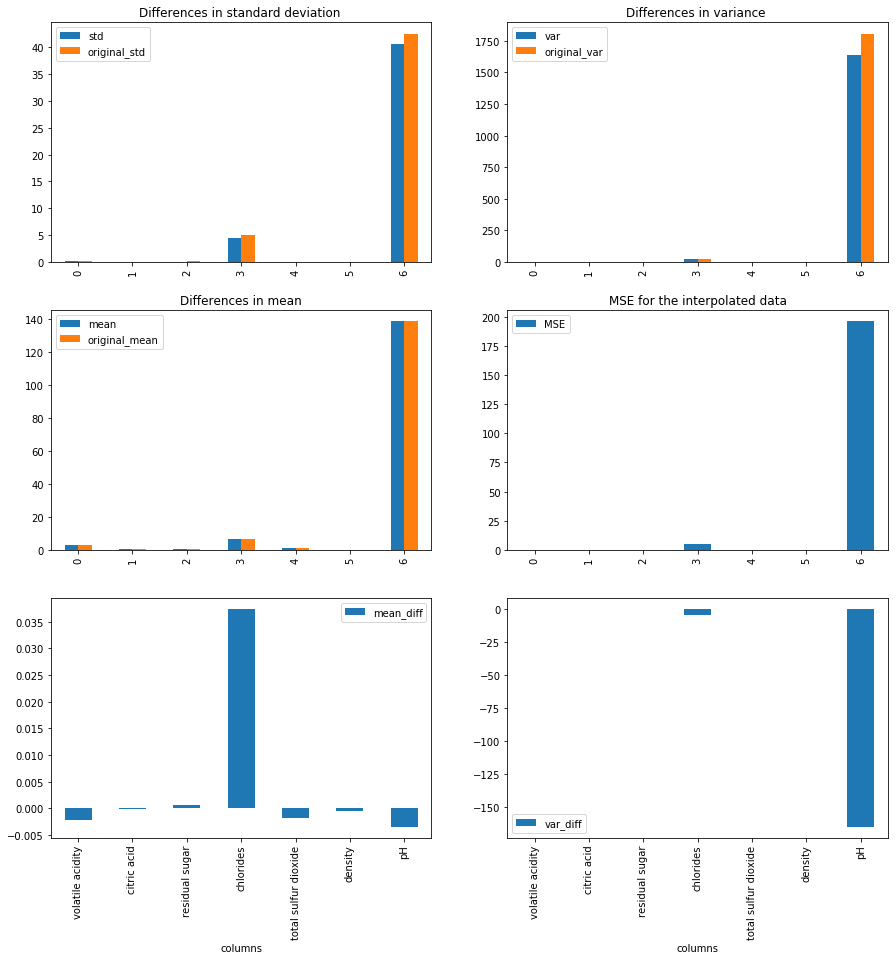

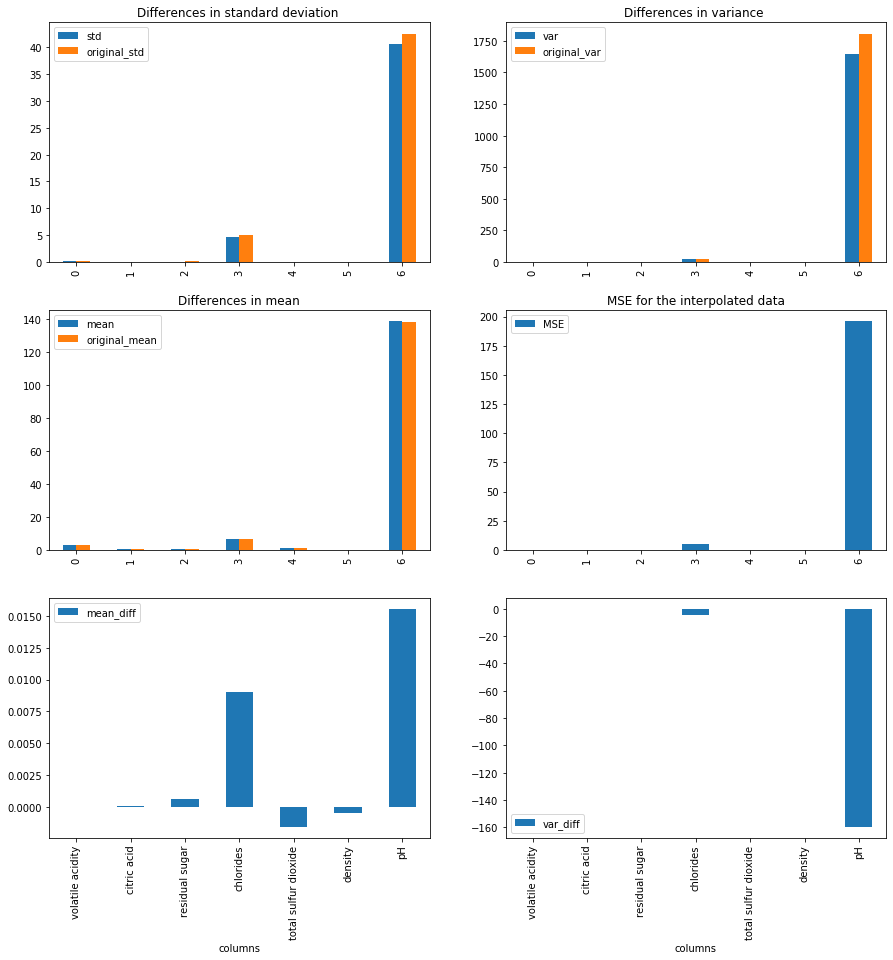

In [213]:
data_final = pd.read_csv('C:\\Users\\Srikar Reddy\\Downloads\\winequality-white.csv', sep =";")
feature1 = data_methods(rem_data,data_final)


feature1.plot_perc_of_null_values()
feature1.mean_naive()

# print(feature1.drop_cols)
feature1.naive_lin_regression()
feature1.ridge_regression(2)

feature1.lasso_regression(0.1)
# feature1.knn(10)

# Generation of synthetic data

In [214]:

df = pd.read_csv('C:\\Users\\Srikar Reddy\\Downloads\\winequality-white.csv', sep =";")

# Determine the mean and standard deviation of the columns
mean_fixed_acidity = df.iloc[:, 0].mean()
mean_volatile_acidity = df.iloc[:, 1].mean()
mean_citric_acid = df.iloc[:, 2].mean()
mean_residual_sugar = df.iloc[:, 3].mean()
mean_chlorides = df.iloc[:, 4].mean()
mean_free_sulfur_dioxide = df.iloc[:, 5].mean()
mean_total_sulfur_dioxide = df.iloc[:, 6].mean()
mean_density = df.iloc[:, 7].mean()
mean_pH = df.iloc[:, 8].mean()
mean_sulphates = df.iloc[:, 9].mean()
mean_alcohol = df.iloc[:, 10].mean()

sd_fixed_acidity = df.iloc[:, 0].std()
sd_volatile_acidity = df.iloc[:, 1].std()
sd_citric_acid = df.iloc[:, 2].std()
sd_residual_sugar = df.iloc[:, 3].std()
sd_chlorides = df.iloc[:, 4].std()
sd_free_sulfur_dioxide = df.iloc[:, 5].std()
sd_total_sulfur_dioxide = df.iloc[:, 6].std()
sd_density = df.iloc[:, 7].std()
sd_pH = df.iloc[:, 8].std()
sd_sulphates = df.iloc[:, 9].std()
sd_alcohol = df.iloc[:, 10].std()

# Use Normal distribution to generate new data with 1000 rows


fixed_acidity = np.random.normal(mean_fixed_acidity, sd_fixed_acidity, 1000).tolist()
volatile_acidity = np.random.normal(mean_volatile_acidity, sd_volatile_acidity, 1000).tolist()
citric_acid = np.random.normal(mean_citric_acid, sd_citric_acid, 1000).tolist()
residual_sugar = np.random.normal(mean_residual_sugar, sd_residual_sugar, 1000).tolist()
chlorides = np.random.normal(mean_chlorides, sd_chlorides, 1000).tolist()
free_sulfur_dioxide = np.random.normal(mean_free_sulfur_dioxide, sd_free_sulfur_dioxide, 1000).tolist()
total_sulfur_dioxide = np.random.normal(mean_total_sulfur_dioxide, sd_total_sulfur_dioxide, 1000).tolist()
density = np.random.normal(mean_density, sd_density, 1000).tolist()
pH = np.random.normal(mean_pH, sd_pH, 1000).tolist()
sulphates = np.random.normal(mean_sulphates, sd_sulphates, 1000).tolist()
alcohol = np.random.normal(mean_alcohol, sd_alcohol, 1000).tolist()

generated_data = [fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide,
                  total_sulfur_dioxide, density, pH, sulphates, alcohol]
# print(generated_data)
generated_data = zip(*generated_data)

new_data = pd.DataFrame(generated_data, columns=("fixed_acidity", "volatile_acidity", "citric_acid",
                                                 "residual_sugar", "chlorides", "free_sulfur_dioxide",
                                                 "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol"))
print(new_data)
    

     fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0         5.438443          0.441439     0.391584        5.700246   0.084831   
1         6.480482          0.248256     0.478533       10.875139   0.040413   
2         5.904033          0.356718     0.256335       10.418443   0.054979   
3         6.550473          0.199234     0.279990        5.236445   0.079139   
4         6.523641          0.353398     0.294530        2.307736   0.053339   
..             ...               ...          ...             ...        ...   
995       8.379449          0.381907     0.414494        0.106521   0.054012   
996       7.591703          0.324668     0.451202        7.344098   0.071935   
997       7.640908          0.349288     0.290834       13.160833   0.056798   
998       6.397226          0.329351     0.413944        3.797984   0.048113   
999       6.316188          0.274489     0.297229        1.731183   0.042518   

     free_sulfur_dioxide  total_sulfur_